<a href="https://colab.research.google.com/github/rwanish/task-tracker/blob/main/Atelier_1_final_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>  Deep Learning TP 1 </center>

## Exercice de TD (OR) avec Keras Perceptron simple (1 neurone)

Vous trouverez ci-dessous le code concernant la modélisation de la fonction logique "OR" par un perceptron simple couche

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation
from keras import initializers
# le OR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[1]])

network = Sequential()

network.add(Dense(1, input_dim = 2, kernel_initializer=initializers.Constant(0.5),
            bias_initializer=initializers.Constant(-0.5)))

network.add(Activation("sigmoid"))

network.compile(loss = "mse", optimizer = 'SGD')

network.fit(X, Y, epochs = 10)

print(network.get_weights())


Using TensorFlow backend.


Epoch 1/10
4/4 [==============================] - 0s 35ms/step - loss: 0.1963
Epoch 2/10
4/4 [==============================] - 0s 501us/step - loss: 0.1959
Epoch 3/10
4/4 [==============================] - 0s 497us/step - loss: 0.1955
Epoch 4/10
4/4 [==============================] - 0s 751us/step - loss: 0.1951
Epoch 5/10
4/4 [==============================] - 0s 501us/step - loss: 0.1947
Epoch 6/10
4/4 [==============================] - 0s 750us/step - loss: 0.1944
Epoch 7/10
4/4 [==============================] - 0s 498us/step - loss: 0.1940
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1936
Epoch 9/10
4/4 [==============================] - 0s 750us/step - loss: 0.1932
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.1929
[array([[0.5105952],
       [0.5105952]], dtype=float32), array([-0.48764506], dtype=float32)]


####  <font color='blue'> Commenter en détail chaque ligne de code utilisée </font>

#### <font color='blue'> Que signifie epoch=10 ?

La réponse du neurone à l'entré X est donnée ci-dessous

In [ ]:
network.predict(X)

array([[0.3804485 ],
       [0.5057373 ],
       [0.5057373 ],
       [0.63030964]], dtype=float32)

#### <font color='blue'>Vérifier par le calcul les résultats obtenus

#### <font color='blue'> En prenat en compte les valeurs des poids W0=-0.4876, W1=0.5106 et W2=0.5106, démontrer que l'expression  de la droite de régression est de la forme \\[y=-x+0.95]comme le montre la figure ci-dessous.   </font>

![regression.png](attachment:regression.png)

#### <font color='blue'> Rappeler la formule de la MSE (Mean Square error). Vérifier par calcul  la valeur de la MSE vaut 0.1929 (loss=0.1929)  )  </font>

## Exercice (AND) avec Keras

#### <font color='blue'> Appliquer la même démarche pour un opérateur AND. Vous justifierez que la fonction AND est correctement réalisée par le neurone. Vous justifierez la valeur de la mse </font>

#### <font color='blue'> Peut-on réaliser un  OU exclusif avec une approche similaire (un seul neurone). Justifier votre réponse. </font>

## MNIST

La base de données MNIST pour Modified National Institute of Standards and Technology, est une base de données de chiffres écrits à la main. La base MNIST est devenu un test standard. Elle regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST1. Ce sont des images en noir et blanc, normalisées centrées de 28 pixels de côté.
La figure ci-dessous présente un exemple de réseau de neurone multicouches appliqué à la base MNIST

#### <font color='blue'> Expliquer pourquoi le réseau comprend 784 entrées et 10 sorties.

![mnist.png](attachment:mnist.png)

###  Importation des librairies

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras
keras.__version__

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix


#### <font color='blue'> Dans quel cas est-il utile d'afficher les configurations ci-dessous ? </font>

In [ ]:
import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9535188647397318155
]


#### <font color='blue'> Expliquer ce que signifient batch size, epochs et N_classes </font>

In [ ]:
batch_size = 128
epochs = 10
N_classes = 10

####  <font color='blue'> Expliquer les lignes de code ci-dessous. En particulier expliquer comment sont obtenues les données d'aprentissage X_train et Y_train</font>

In [ ]:
import pandas as pd
# path="" # Si les données sont dans le répertoire courant sinon:
path=""
Dtrain=pd.read_csv(path+"mnist_train.csv",header=None)
X_train = Dtrain.values[:,:-1]
Y_train = Dtrain.values[:,-1]

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1]

*Attention*, avec Keras, la variable réponse doit être une matrice binaire où chaque classe est représentée par une indicatrice : pour chaque individu, l'élément de la colone correspondant à la classe à laquelle il appartient est à 1, sinon il est à 0.

Keras possède une fonction `to_catergorical` permettant de convertir directement le vecteur variable `Y_train` de réponse en matrice (`array numpy`) indicatrice`Y_train_cat`.

C'est l'équivalent de `get_dummies` de `pandas`
 ou `OneHotEncoder` de `scikit-learn`.

In [ ]:
Y_train_cat = ku.to_categorical(Y_train, N_classes)
Y_test_cat = ku.to_categorical(Y_test, N_classes)

#### <font color='blue'> Quelle est la différence entre Y_train et Y_train_cat   ? </font>

In [ ]:
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Apprentissage et prévision du test Avec réseau dense

La figure ci dessous présente un réseau standard et un réseau sur lequel est appliqué un dropout

![dropout.png](attachment:dropout.png)

Première tentative d'appliquer un réseaux de neurone de type Perceptron classique avec 4 couches:
* Input Layer  
* Hidden Layer : Dense: 128 neurones + Foncton d'activation *relu* et on applique un *Dropout*: 20% des neurones tiré aléatoirement sont desactivés
* Hidden Layer : Dense: 128 neurones + Foncton d'activation *relu* er on applique *Dropout*: 20% des neurones tiré aléatoirement sont desactivées
* Output Layer *softmax* fournit la classification

### Apprentissage

In [ ]:
# Définition du réseau
model = km.Sequential()
model.add(kl.Dense(128, activation='relu', input_shape=(784,)))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.2))

model.add(kl.Dense(N_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


   #### <font color='blue'> Retrouvez manuellement le nombre de paramètres du réseau </font>

In [ ]:
# apprentissage
model.compile(loss='categorical_crossentropy',
              optimizer=ko.RMSprop(),
              metrics=['accuracy'])
ts = time.time()
history = model.fit(X_train, Y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test_cat))
te = time.time()
t_train_mpl = te-ts

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 6.4166 - acc: 0.5920 - val_loss: 3.5240 - val_acc: 0.7751
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 4.0198 - acc: 0.7442 - val_loss: 3.4507 - val_acc: 0.7802
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 3.5601 - acc: 0.7747 - val_loss: 2.8620 - val_acc: 0.8205
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 3.0400 - acc: 0.8079 - val_loss: 1.4815 - val_acc: 0.9052
Epoch 5/10
60000/60000 [==============================] - 9s 146us/step - loss: 1.9331 - acc: 0.8762 - val_loss: 1.2686 - val_acc: 0.9189
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.7508 - acc: 0.8883 - val_loss: 1.2815 - val_acc: 0.9189
Epoch 7/10
60000/60000 [==============================] - 9s 144us/step - loss: 1.6389 - acc: 0.8955 - val_loss: 1.0864 

#### <font color='blue'>Le dropout permet d'éviter le sur-apprentissage. Expliquer ce terme </font>

In [ ]:
# apprentissage
model.compile(loss='mse',
              optimizer='SGD',
              metrics=['accuracy'])
ts = time.time()
history = model.fit(X_train, Y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test_cat))
te = time.time()
t_train_mpl = te-ts

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1551 - acc: 0.2175 - val_loss: 0.1206 - val_acc: 0.3913
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1250 - acc: 0.3697 - val_loss: 0.1087 - val_acc: 0.4520
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1135 - acc: 0.4275 - val_loss: 0.0953 - val_acc: 0.5186
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1010 - acc: 0.4900 - val_loss: 0.0769 - val_acc: 0.6110
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0800 - acc: 0.5948 - val_loss: 0.0576 - val_acc: 0.7075
Epoch 6/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0686 - acc: 0.6527 - val_loss: 0.0500 - val_acc: 0.7468
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0615 - acc: 0.6881 - val_loss: 0.0443 - val_acc

### Résultats

Test loss: 0.0293820136025548
Test accuracy: 0.8529
Time Running: 30.53 seconds


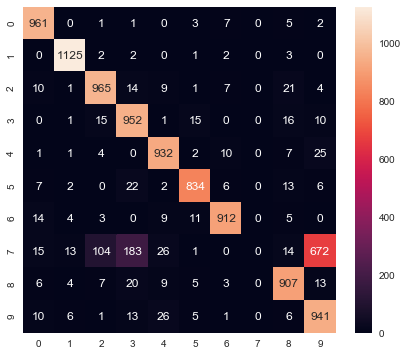

In [ ]:
score_mpl = model.evaluate(X_test, Y_test_cat, verbose=0)
predict_mpl = model.predict(X_test)
print('Test loss:', score_mpl[0])
print('Test accuracy:', score_mpl[1])
print("Time Running: %.2f seconds" %t_train_mpl )
fig=plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax = sb.heatmap(pd.DataFrame(confusion_matrix(Y_test, predict_mpl.argmax(1))), annot=True, fmt="d")

#### <font color='blue'>Commenter la matrice de confusion </font>


#### <font color='blue'>Expérimenter d'autres paramètrages du réseau et commenter les résultats </font>



#### <font color='blue'> Faites tourner de nouveaux l'algorithme en normalisant les données afin que celles-ci soit comprises entre 0 et 1. Qu'observez vous? </font>